# Exploratory Data Analysis

In [1]:
# Displaying data in python
import pandas as pd
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Calculating Summary Statistics

In [2]:
# Calculating the mean for one col
hour['count'].mean()

189.46308763450142

In [3]:
# Calculating other summary stats

print(hour['count'].median())
print(hour['count'].std())
print(hour['registered'].max())
print(hour['registered'].min())

142.0
181.38759909186473
886
0


In [4]:
#Another way to get summary stats
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

## Analyzing Subsets of Data

In [5]:
#getting the 4th row and count cell in the data

print(hour.loc[3, "count"])

13


In [6]:
#obtaining the 2nd through 4th row of the registered col

print(hour.loc[2:4, "registered"])

2    27
3    10
4     1
Name: registered, dtype: int64


In [7]:
#getting the mean of the nighttime registered

print(hour.loc[hour['hr'] < 5, "registered"].mean())

20.7881427367238


In [8]:
#Getting the mean for nightime and temp < 50
print(hour.loc[(hour['hr'] < 5) & (hour['temp'] < 50), "count"].mean())

#Getting the mean for nightime and temp > 50
print(hour.loc[(hour['hr'] < 5) & (hour['temp'] > 50), "count"].mean())

25.919640348412475
nan


## Seasonal Data

In [9]:
#finding the mean count by season
print(hour.groupby('season')['count'].mean())

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64


In [10]:
#finding the mean count by season and holiday
print(hour.groupby(['season', 'holiday'])['count'].mean())

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


## Visualizing Data with Matplotlib

### Drawing and Displaying a simple plot

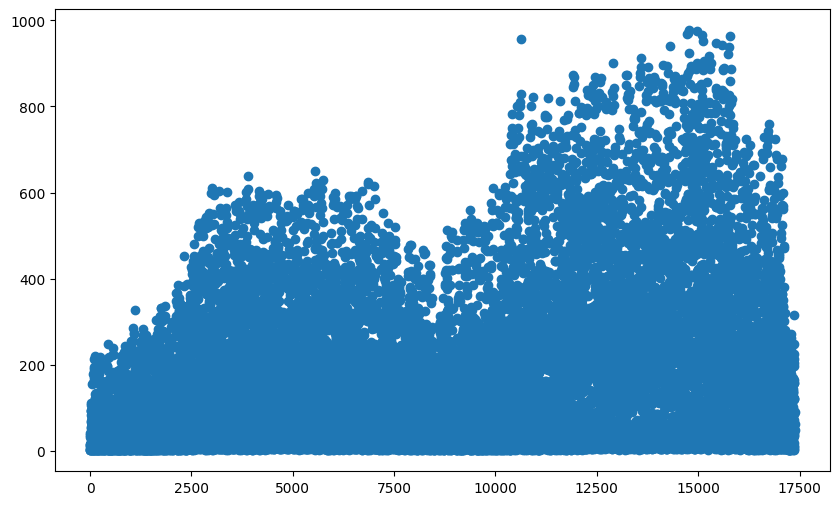

In [11]:
# scatter plot of the instant col and count
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(hour['instant'], hour['count'])
plt.show()

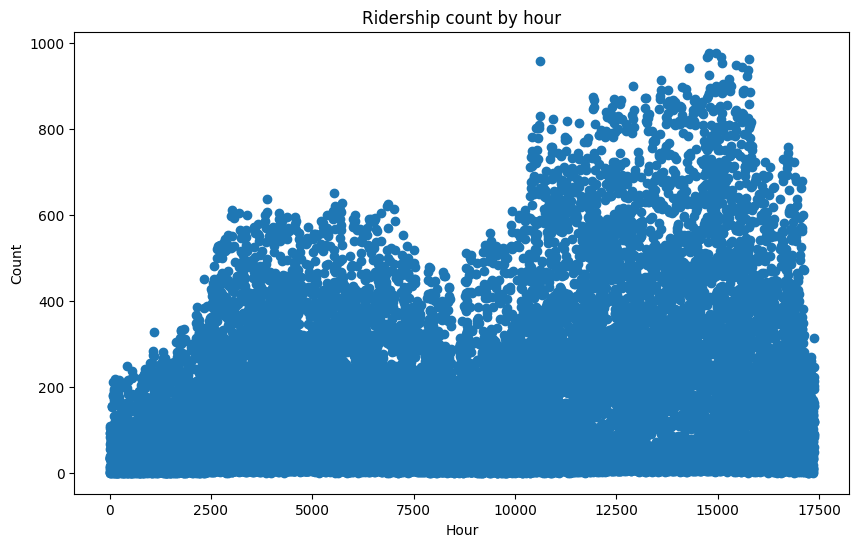

In [12]:
#Adding titles and labels to the scatter pplot above

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(hour['instant'], hour['count'])
plt.title('Ridership count by hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

### Plotting subsets of data

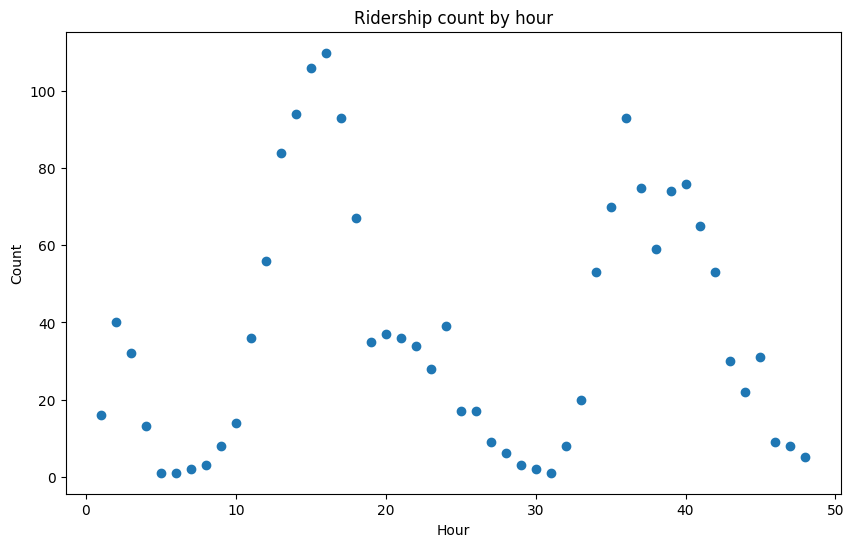

In [13]:
# taking the first 48 rows of the dataset
hour_subset48 = hour.iloc[:48]
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(hour_subset48['instant'], hour_subset48['count'])
plt.title('Ridership count by hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

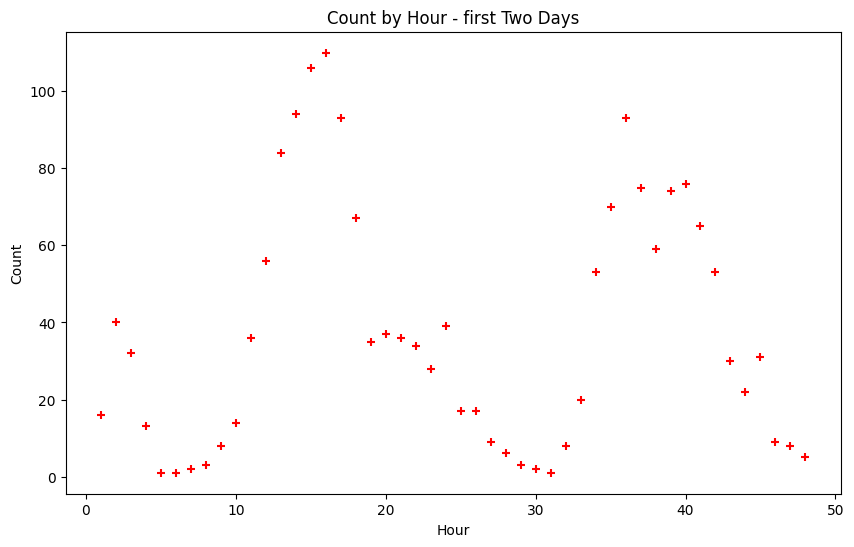

In [14]:
#Changing the appearance of the above scatter plot

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(hour_subset48['instant'], hour_subset48['count'],c='red',marker="+")
plt.title('Count by Hour - first Two Days')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()



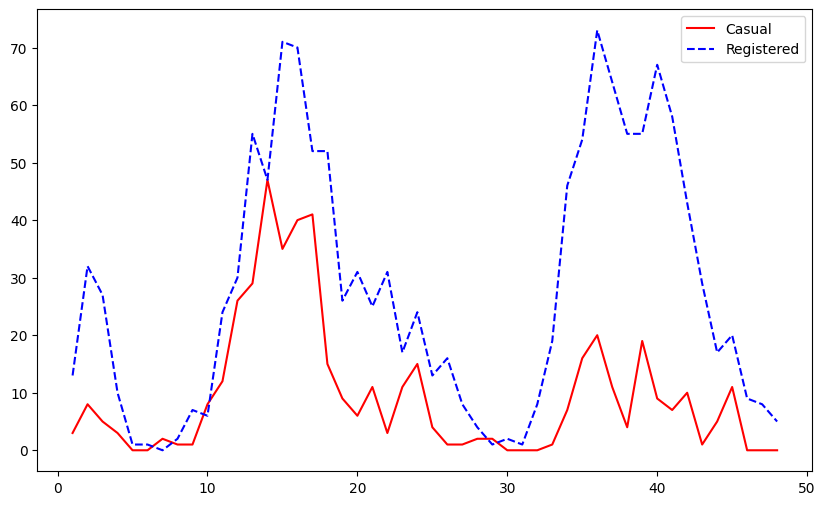

In [15]:
# creating a line plot of instant vs casual from the subset of hour data

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hour_subset48['instant'], hour_subset48['casual'],c='red',linestyle='-',label = 'Casual')
ax.plot(hour_subset48['instant'], hour_subset48['registered'],c='blue',linestyle='--',label = 'Registered')
ax.legend()



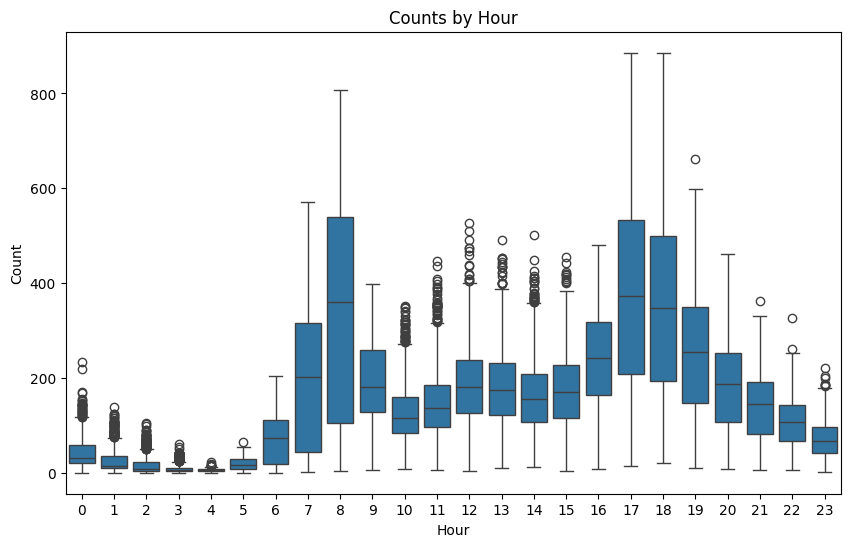

In [16]:
#Creating a boxplot using the full dataset
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='hr', y='registered', data=hour)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Counts by Hour')
plt.show()

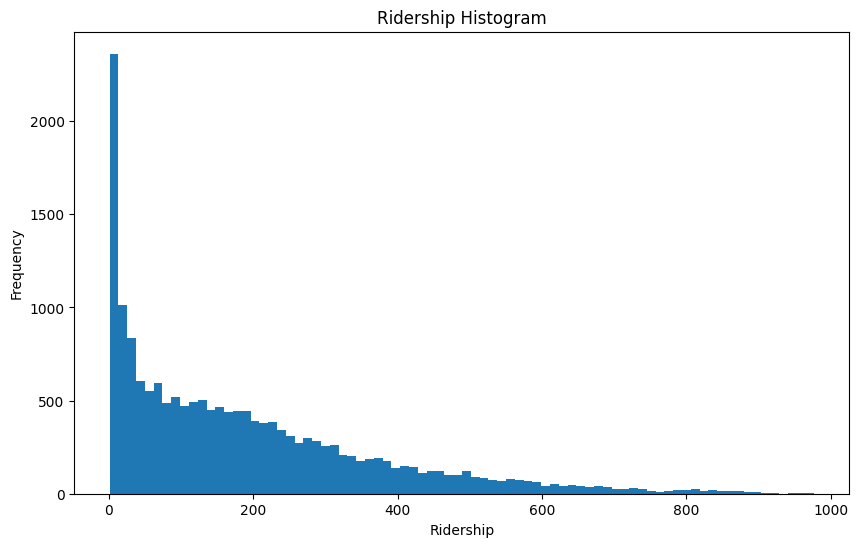

In [17]:
#Creating a histogram of count with 80 bins

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(hour['count'], bins=80)
plt.xlabel('Ridership')
plt.ylabel('Frequency')
plt.title('Ridership Histogram')
plt.show()

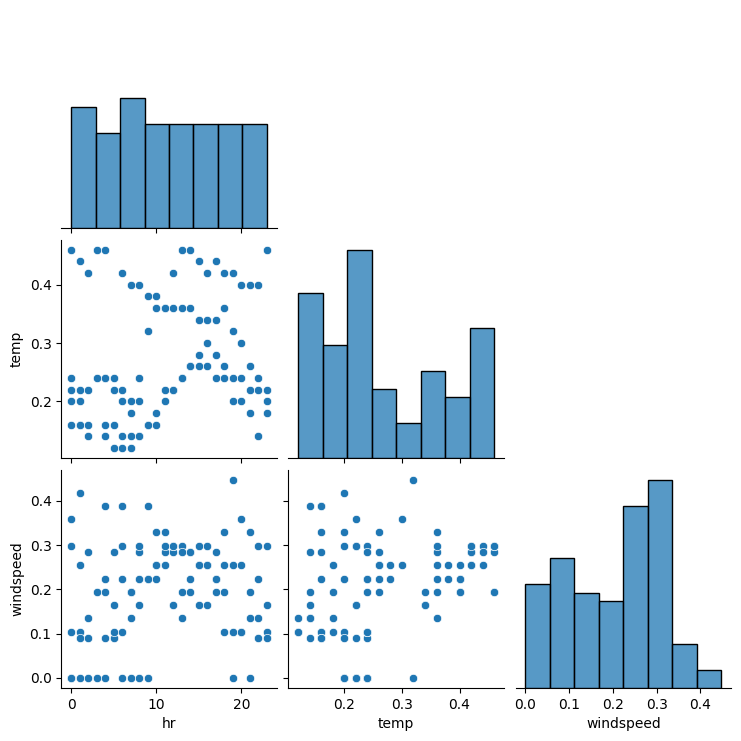

In [18]:
# creating a pair plot for the following variables hr temp windspeed for the first 100 rows of the full dataset

sns.pairplot(hour[['hr', 'temp', 'windspeed']].iloc[:100],corner=True)
plt.show()

## Exploring Correlation

### Calculating Correlations

In [19]:
#Calculating the correlation between casual and registered

print(hour['casual'].corr(hour['registered']))

#Calculating the correlation between temp and hum

print(hour['temp'].corr(hour['hum']))

0.5066177004294634
-0.06988139105119354


### Finding correclations between variables

In [20]:
# creating a correlation matrix with variables hr temp windspeed

print(hour[['hr', 'temp', 'windspeed']].corr())

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


### Creating heat maps

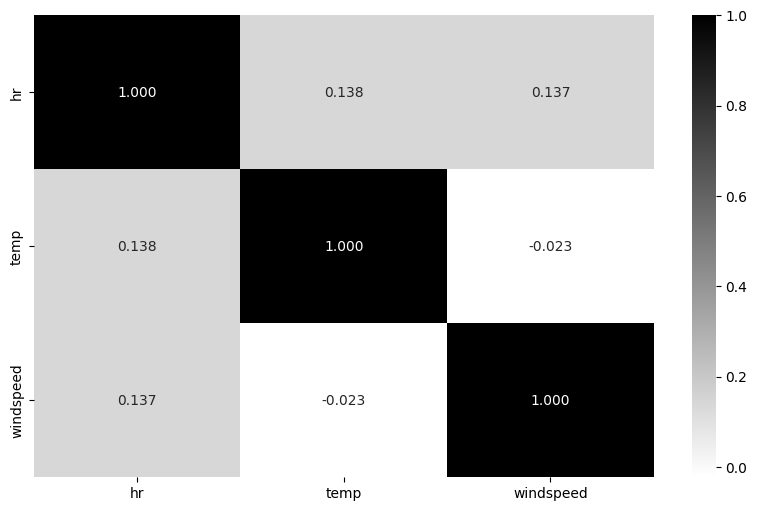

In [21]:
#creating a heat map with variables hr tmp windspeed

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(hour[['hr', 'temp', 'windspeed']].corr(), annot=True,cmap="binary",fmt=".3f",xticklabels=['hr', 'temp', 'windspeed'], yticklabels=['hr', 'temp', 'windspeed'])
plt.show()


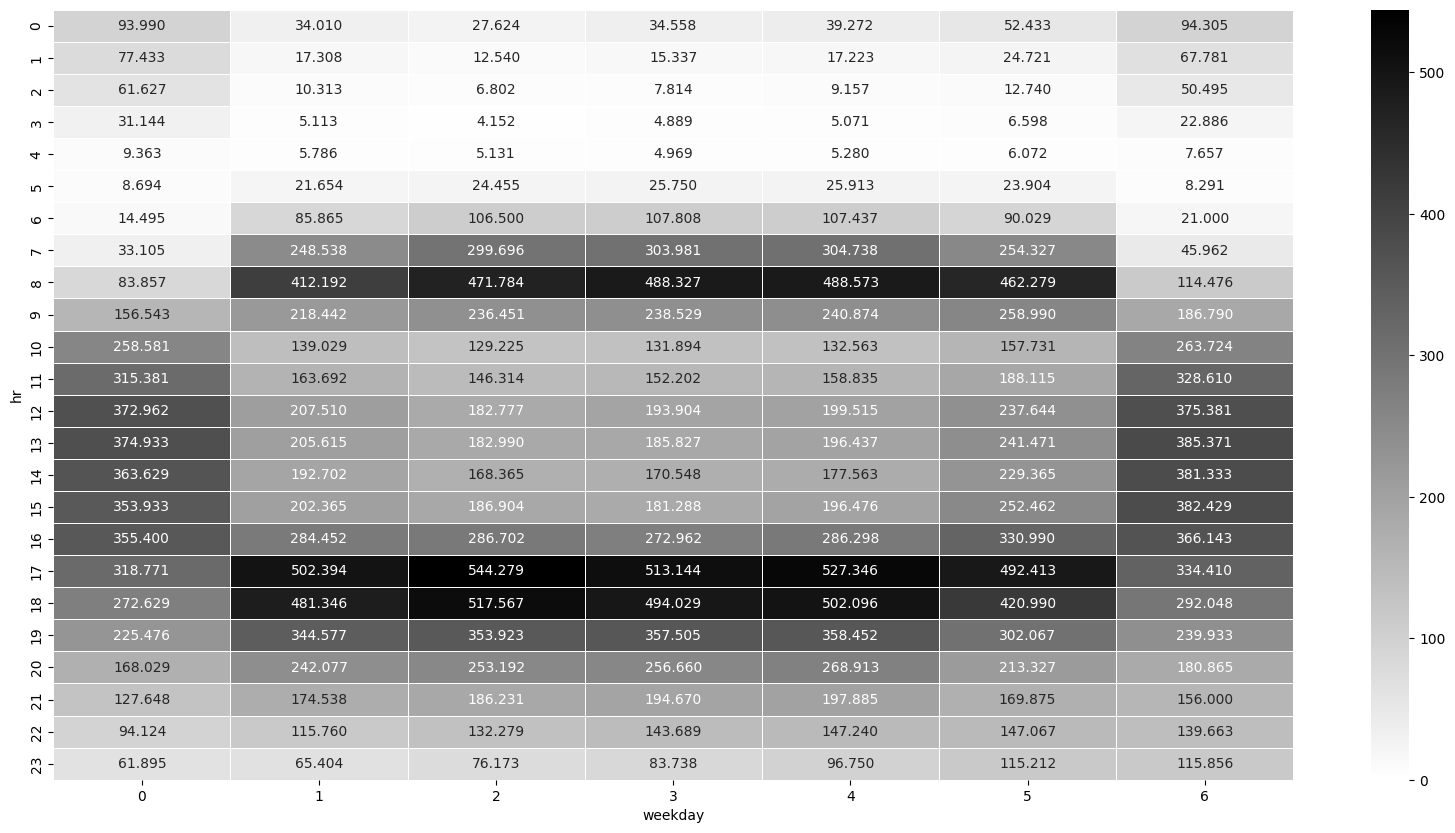

In [23]:
# creating a heat map of a pivot table based on weekday and hr

df_hm = hour.pivot_table(index='hr', columns='weekday', values='count')
#drawing the heat map
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_hm, annot=True,cmap="binary",fmt=".3f",vmin=0,linewidths=.5)
plt.show()